In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PowerTransformer, StandardScaler
# from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from scipy import stats
import pyhere


In [2]:
dir_data_raw = pyhere.here().resolve().joinpath("data", "raw")
dir_data_interim = pyhere.here().resolve().joinpath("data", "interim")
dir_data_external = pyhere.here().resolve().joinpath("data", "external")

In [3]:
csv_power_plants = pd.read_csv(dir_data_interim/"power_plants_with_generation_transformed.csv", index_col=[0])

In [4]:
df_transformed = pd.read_csv(dir_data_external/"v2_transformed_data_combined_with_nasa.csv", index_col=['index'])

In [5]:
# csv_power_plants.loc[0:34935, ['capacity_mw', 'primary_fuel_transformed']].index.name = "index"
csv_power_plants.index.rename('index', inplace=True)

In [6]:
columns_to_combine = [
                        'capacity_mw',
                        'primary_fuel_transformed',
                        'generation_gwh_2013',
                        'generation_gwh_2014',
                        'generation_gwh_2015',
                        'generation_gwh_2016',
                        'generation_gwh_2017',
                        'generation_gwh_2018',
                        'generation_gwh_2019'
                    ]
# df_transformed_combined = df_transformed.merge(csv_power_plants.loc[0:24360, ['capacity_mw', 'primary_fuel_transformed']],left_on="index", right_on="index")
df_transformed_combined = df_transformed.merge(csv_power_plants[columns_to_combine],left_on="index", right_on="index")

In [7]:
df_transformed_combined

,latitude,longitude,ANN_ALLSKY_KT_2012,ANN_ALLSKY_KT_2013,ANN_ALLSKY_KT_2014,ANN_ALLSKY_KT_2015,ANN_ALLSKY_KT_2016,ANN_ALLSKY_KT_2017,ANN_ALLSKY_KT_2018,ANN_ALLSKY_KT_2019,...,winter_WS50M_MIN_AVG_2019,capacity_mw,primary_fuel_transformed,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
index,,,,,,,,,,,,,,,,,,,,,
0,32.3220,65.1190,0.69,0.70,0.70,0.68,0.71,0.71,0.70,0.69,...,1.176667,33.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31.6700,65.7950,0.70,0.70,0.70,0.69,0.72,0.71,0.70,0.69,...,1.603333,10.0,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31.6230,65.7920,0.70,0.70,0.70,0.69,0.72,0.71,0.70,0.69,...,1.603333,10.0,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34.5560,69.4787,0.65,0.65,0.65,0.63,0.66,0.67,0.67,0.65,...,1.516667,66.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34.6410,69.7170,0.65,0.65,0.65,0.63,0.66,0.67,0.67,0.65,...,0.923333,100.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,-12.9667,28.6333,0.59,0.60,0.59,0.59,0.60,0.57,0.59,0.59,...,1.750000,50.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34932,-12.8167,28.2000,0.59,0.60,0.59,0.59,0.60,0.57,0.59,0.59,...,1.790000,20.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34933,-17.9167,25.8500,0.62,0.62,0.61,0.64,0.62,0.59,0.62,0.65,...,2.903333,108.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN


primary_fuel_transformed
Other                       18917
Solar                       10665
Wind                         5344
dtype: int64


<AxesSubplot:xlabel='primary_fuel_transformed'>

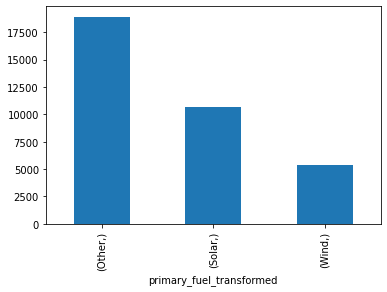

In [8]:
print(df_transformed_combined[['primary_fuel_transformed']].value_counts())
df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

In [10]:
df_transformed_combined = df_transformed_combined.loc[df_transformed_combined['generation_gwh_2013'].notna() & df_transformed_combined['generation_gwh_2014'].notna() & df_transformed_combined['generation_gwh_2015'].notna() & df_transformed_combined['generation_gwh_2016'].notna() & df_transformed_combined['generation_gwh_2017'].notna() & df_transformed_combined['generation_gwh_2018'].notna() & df_transformed_combined['generation_gwh_2019'].notna()]

primary_fuel_transformed
Other                       18917
Solar                       10665
Wind                         5344
dtype: int64


<AxesSubplot:xlabel='primary_fuel_transformed'>

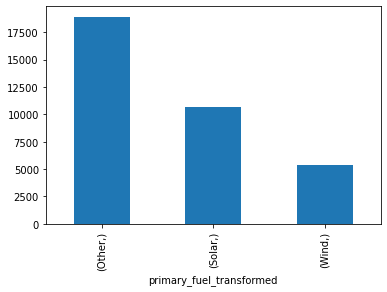

In [9]:
print(df_transformed_combined[['primary_fuel_transformed']].value_counts())
df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

In [10]:
label_encoder = LabelEncoder()
# df_transformed_combined.isna().sum()
# df_transformed_combined[df_transformed_combined.isna().any(axis=1)]
# df_transformed_combined.dropna(inplace = True)
df_transformed_combined = df_transformed_combined[df_transformed_combined['primary_fuel_transformed'].notna()]
df_transformed_combined['code_prim_fuel_transf'] = label_encoder.fit_transform(df_transformed_combined['primary_fuel_transformed'])


/tmp/ipykernel_422/2992247541.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed_combined['code_prim_fuel_transf'] = label_encoder.fit_transform(df_transformed_combined['primary_fuel_transformed'])


In [11]:
df_target_equivalent = df_transformed_combined[['primary_fuel_transformed', 'code_prim_fuel_transf']].drop_duplicates()
df_target_equivalent

,primary_fuel_transformed,code_prim_fuel_transf
index,,
0,Other,0
1,Solar,1
91,Wind,2


## Balancing the data

In [12]:
# index_rows_to_delete_other = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 0].sample(4000).index
index_rows_to_delete_other = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 0].sample(14000).index
# index_rows_to_delete = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 0].sample(9000).index
# index_rows_to_delete_wind = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 2].sample(100).index
index_rows_to_delete_solar = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 1].sample(5500).index
# index_rows_to_delete_solar = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 1].sample(3000).index


In [13]:
df_transformed_combined.drop(index_rows_to_delete_other, axis = 0, inplace = True)
df_transformed_combined.drop(index_rows_to_delete_solar, axis = 0, inplace = True)
# df_transformed_combined.drop(index_rows_to_delete_wind, axis = 0, inplace = True)

/tmp/ipykernel_422/4142941684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed_combined.drop(index_rows_to_delete_other, axis = 0, inplace = True)
/tmp/ipykernel_422/4142941684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed_combined.drop(index_rows_to_delete_solar, axis = 0, inplace = True)


<AxesSubplot:xlabel='primary_fuel_transformed'>

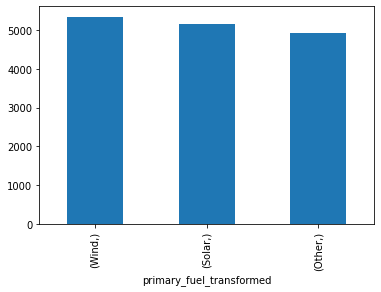

In [14]:
df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

In [15]:
# df_transformed_combined.isna().sum()
# df_transformed_combined[df_transformed_combined.isna().any(axis=1)]
# df_transformed_combined.dropna(inplace = True)
columns_to_drop = [
                        'capacity_mw',
                        'latitude',
                        'longitude',
                        'primary_fuel_transformed',
                        'generation_gwh_2013',
                        'generation_gwh_2014',
                        'generation_gwh_2015',
                        'generation_gwh_2016',
                        'generation_gwh_2017',
                        'generation_gwh_2018',
                        'generation_gwh_2019'
                    ]
pre_X = df_transformed_combined.drop(columns=columns_to_drop)
pre_X.dropna(inplace = True)
X = pre_X.drop(columns=['code_prim_fuel_transf'])
y = pre_X['code_prim_fuel_transf']

In [16]:
y.value_counts()

2    5344
1    5165
0    4917
Name: code_prim_fuel_transf, dtype: int64

In [17]:
# sns.kdeplot(data=pre_X, x='winter_TQV_2009', hue='code_prim_fuel_transf', shade=True)

In [18]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [19]:
def get_accuracy(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(max_leaf_nodes = max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds_val)

    return accuracy

In [20]:
def get_accuracy_knn(n_neighbors, X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds_val)

    return accuracy

In [21]:
mi_scores = make_mi_scores(X, y)
mi_scores[::3]

autumn_ALLSKY_SFC_SW_DWN_2013    0.373073
spring_ALLSKY_SFC_SW_DWN_2017    0.359388
spring_ALLSKY_SFC_SW_DWN_2016    0.356722
autumn_CLRSKY_SFC_SW_DWN_2015    0.356080
autumn_ALLSKY_SFC_SW_DWN_2018    0.354314
                                   ...   
summer_ALLSKY_KT_2017            0.076262
summer_ALLSKY_KT_2019            0.069872
ANN_ALLSKY_KT_2013               0.061426
ANN_ALLSKY_KT_2018               0.051943
autumn_CLRSKY_SFC_SW_DWN_2019    0.000000
Name: MI Scores, Length: 94, dtype: float64

In [22]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

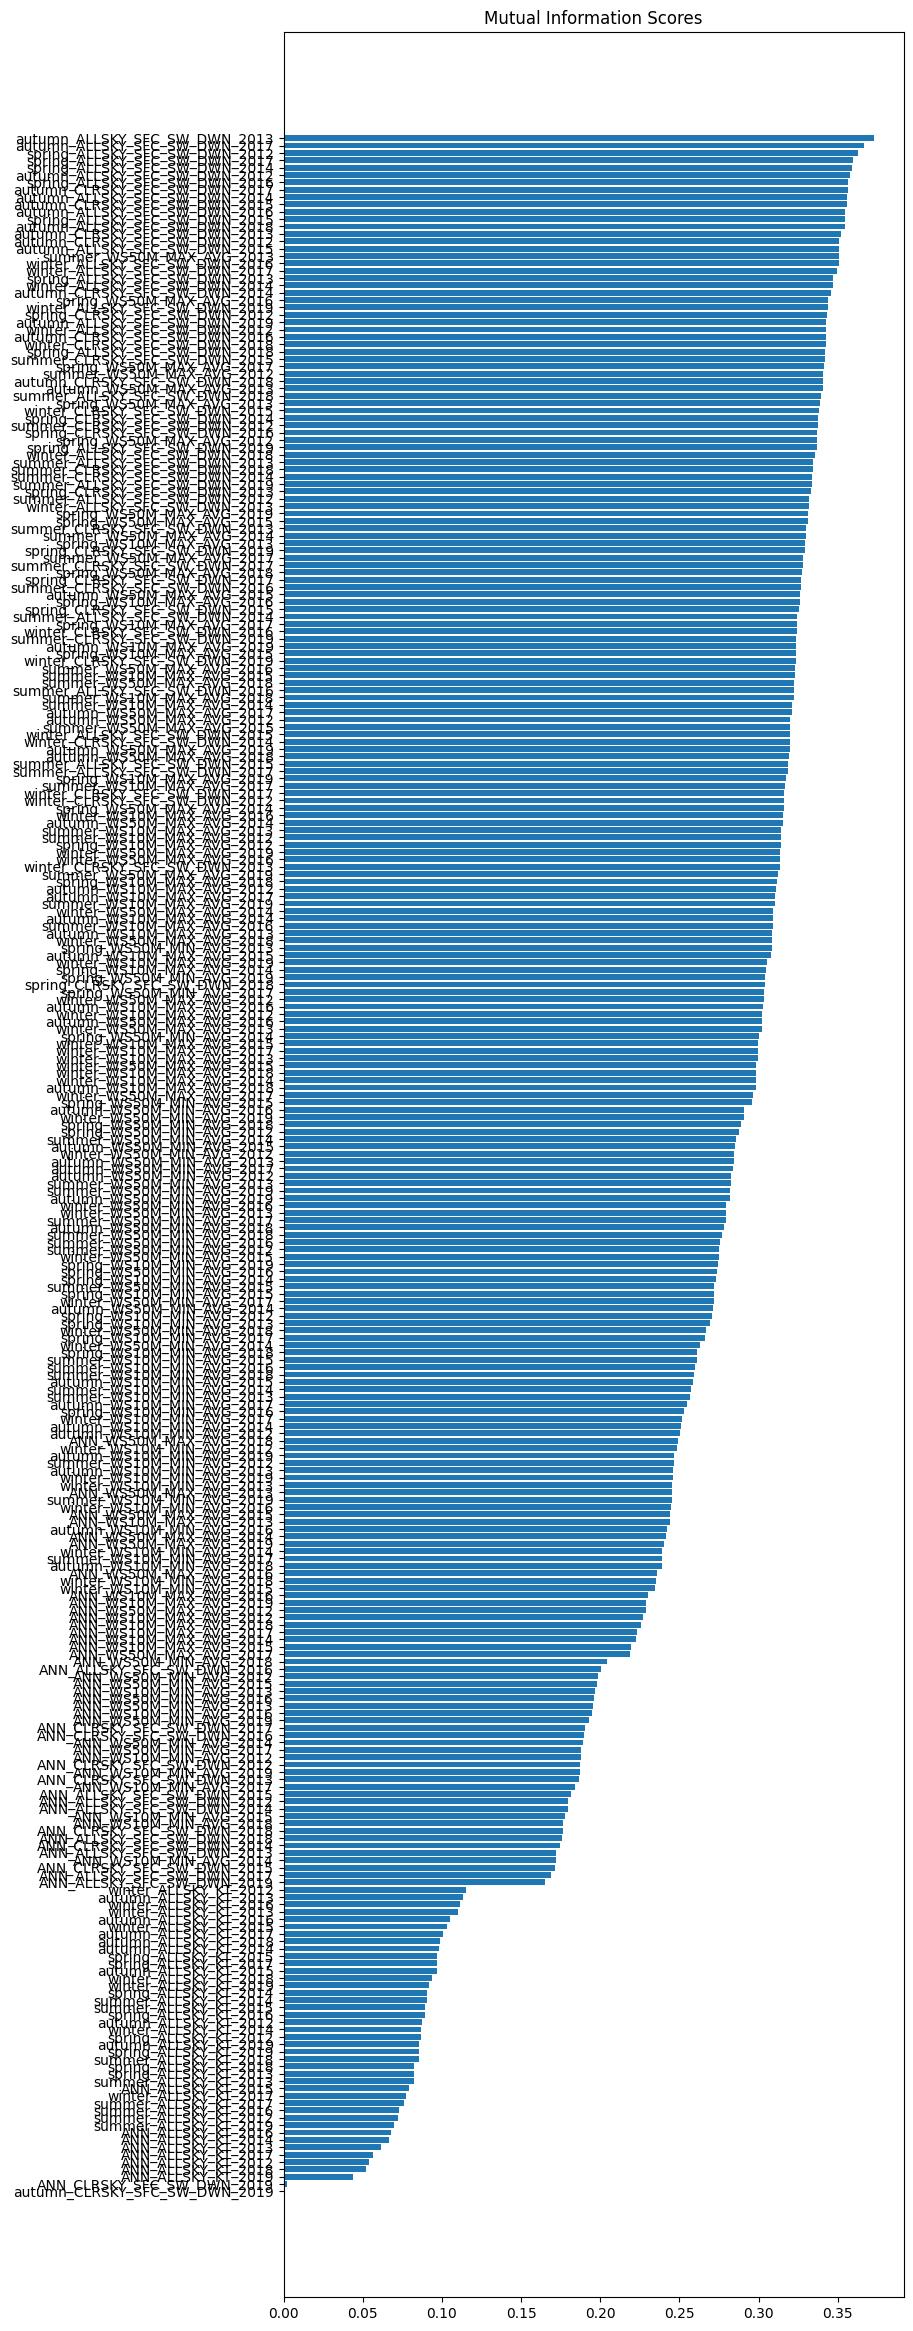

In [23]:
plt.figure(dpi=100, figsize=(8, 30))
plot_mi_scores(mi_scores)

In [194]:
 columns_delete = X.columns.str.contains('ALLSKY_KT') | X.columns.str.contains('ANN') | X.columns.str.contains('autumn_CLRSKY_SFC_SW_DWN_2019')
 X = X.loc[:,~columns_delete]

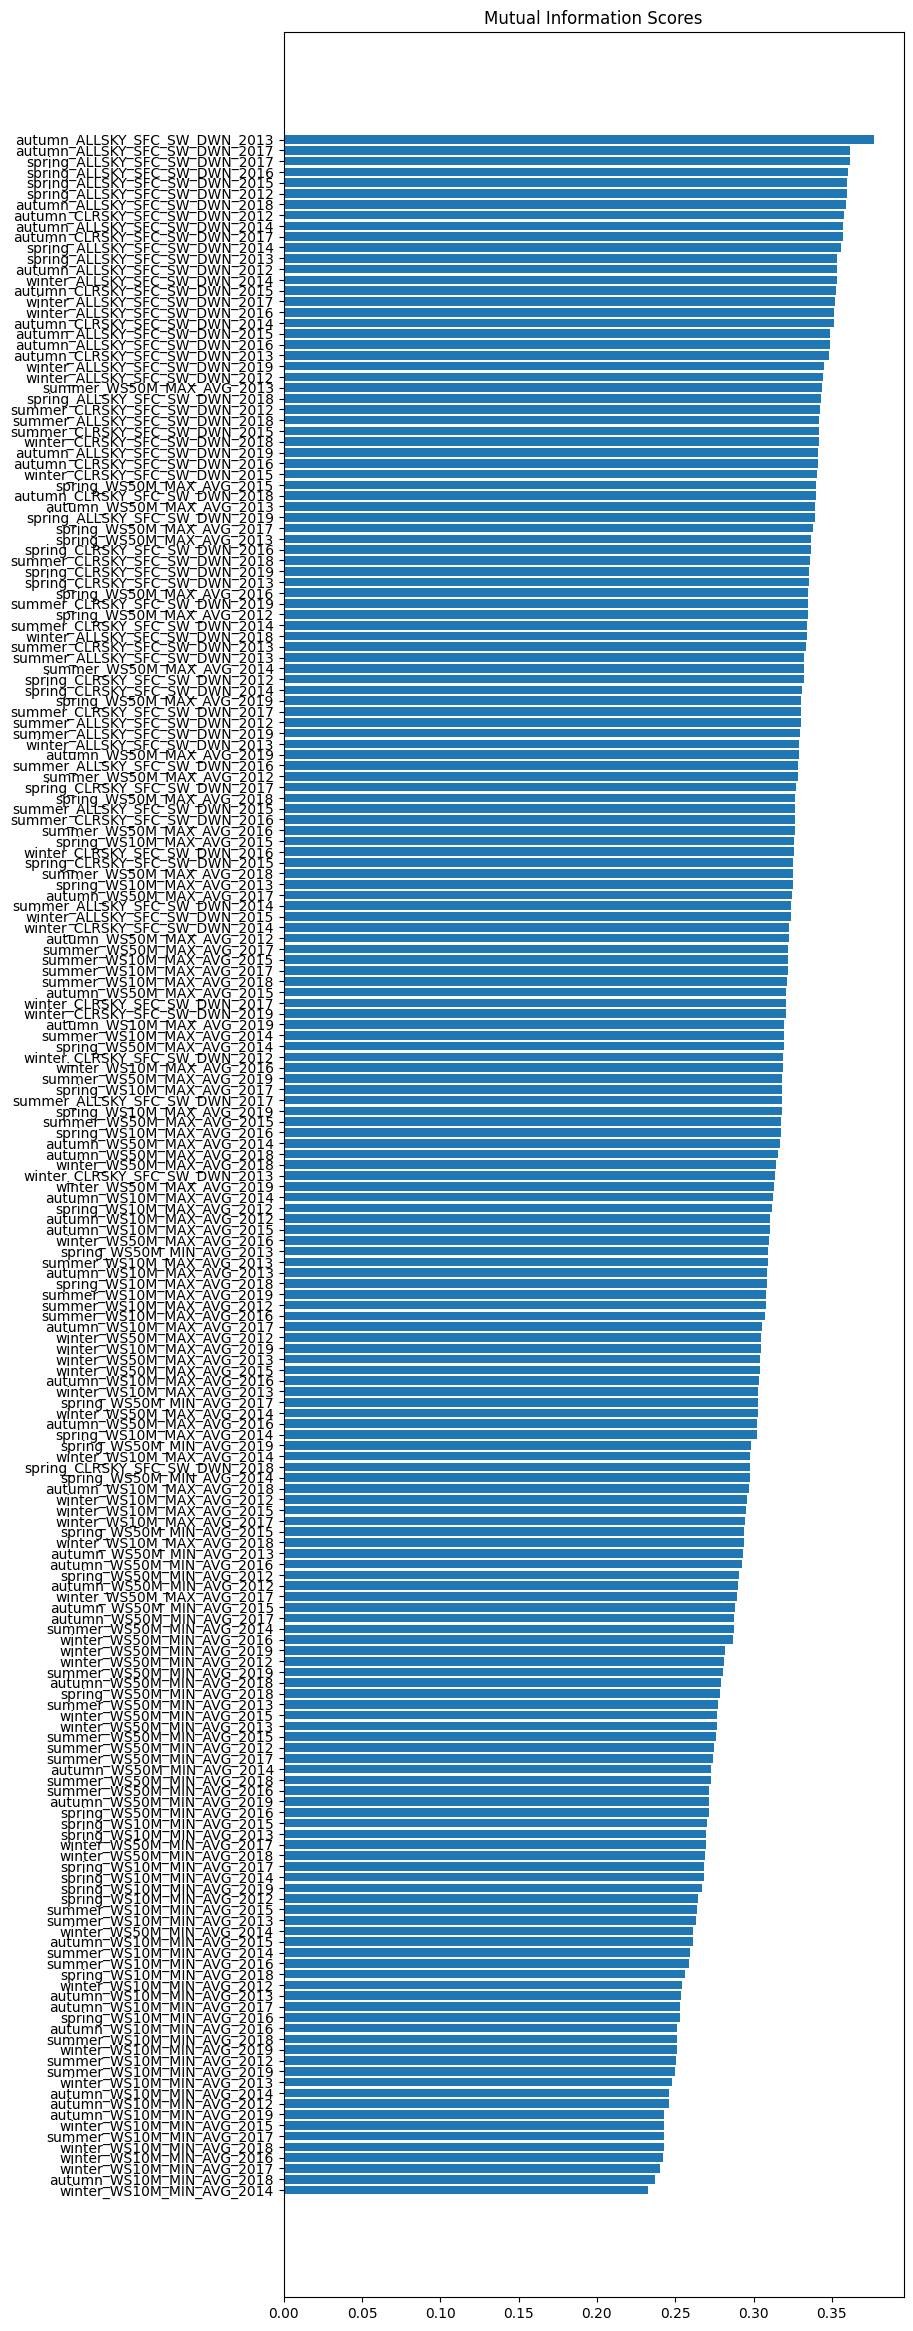

In [125]:
mi_scores = make_mi_scores(X, y)
plt.figure(dpi=100, figsize=(8, 30))
plot_mi_scores(mi_scores)

In [26]:
X.columns

Index(['autumn_ALLSKY_SFC_SW_DWN_2012', 'autumn_ALLSKY_SFC_SW_DWN_2013',
       'autumn_ALLSKY_SFC_SW_DWN_2014', 'autumn_ALLSKY_SFC_SW_DWN_2015',
       'autumn_ALLSKY_SFC_SW_DWN_2016', 'autumn_ALLSKY_SFC_SW_DWN_2017',
       'autumn_ALLSKY_SFC_SW_DWN_2018', 'autumn_ALLSKY_SFC_SW_DWN_2019',
       'autumn_CLRSKY_SFC_SW_DWN_2012', 'autumn_CLRSKY_SFC_SW_DWN_2013',
       ...
       'winter_WS50M_MAX_AVG_2018', 'winter_WS50M_MAX_AVG_2019',
       'winter_WS50M_MIN_AVG_2012', 'winter_WS50M_MIN_AVG_2013',
       'winter_WS50M_MIN_AVG_2014', 'winter_WS50M_MIN_AVG_2015',
       'winter_WS50M_MIN_AVG_2016', 'winter_WS50M_MIN_AVG_2017',
       'winter_WS50M_MIN_AVG_2018', 'winter_WS50M_MIN_AVG_2019'],
      dtype='object', length=192)

In [195]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2,random_state = 0)

## DECISION TREE CLASSIFIER

1200


<AxesSubplot:>

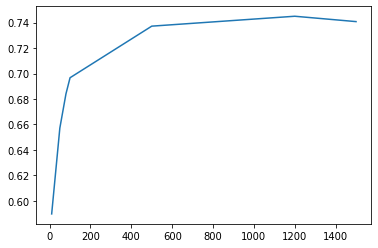

In [196]:
candidate_max_leaf_nodes = [10, 50, 80, 100, 500, 1200, 1500]
results = {}
# Write loop to find the ideal tree size from candidate_max_leaf_nodes


results = {node: get_accuracy(node, train_X, val_X, train_y, val_y) for node in candidate_max_leaf_nodes}
# results = {node: get_accuracy(node, train_X_scaled_pca, val_X_scaled_pca, train_y, val_y) for node in candidate_max_leaf_nodes}
# for node in candidate_max_leaf_nodes:
#     results[node] = get_accuracy(node, X_train, X_test, y_train, y_test)
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = max(results, key=results.get)
print(best_tree_size)
sns.lineplot(data=results, x= results.keys(), y= results.values())

In [197]:
tree_model = DecisionTreeClassifier(max_leaf_nodes = best_tree_size, random_state=0)
tree_model.fit(train_X, train_y)

DecisionTreeClassifier(max_leaf_nodes=1200, random_state=0)

0.7449773169151005
[0.72456254 0.72382496 0.73095624 0.72998379 0.73873582]
Mean: 0.729612670175656, Standard Deviation: 0.005369844523308182


<AxesSubplot:>

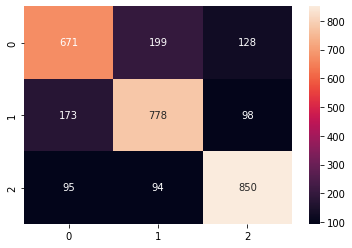

In [200]:
y_pred = tree_model.predict(val_X)
print(tree_model.score(val_X, val_y))
results_cvs = cross_val_score(tree_model, X, y, cv=StratifiedKFold(shuffle = True))
print(results_cvs)
print(f'Mean: {results_cvs.mean()}, Standard Deviation: {results_cvs.std()}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [199]:
accuracy_score(val_y, y_pred)

0.7449773169151005

In [131]:
precision_score(val_y, y_pred, average='weighted')

0.7439892608466226

In [38]:
tree_model.score(val_X, val_y)

0.7512953367875648

In [39]:
# tree.plot_tree(tree_model)

# RANDOM FOREST CLASSIFIER

In [132]:
# Numbers of trees
n_estimators = [int(x) for x in np.arange(10, 101, 10)]
# Numbers of features to consider at every split
# max_features = [1, "sqrt", "log2"]
# Maximum numbers of levels in tree
max_depth = [50, 100, 500]
# Minimum numbers of samples required to split a node
min_samples_split = [2, 10, 50, ]
# Minimum numbers of samples required at each leaf node
min_samples_leaf = [1, 10, 50, 100]
# Method of selecting samples for training each tree
bootstrap = [True, False]

max_leaf_nodes = [10, 100, 500]

param_grid = {
                'n_estimators': n_estimators,
                # 'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap,
                'max_leaf_nodes': max_leaf_nodes
            }



In [33]:
rf_model = RandomForestClassifier(random_state=0)
# rf_grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=5, verbose = 2, n_jobs=4)
rf_grid = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid, n_iter = 30, cv=5, verbose = 2, n_jobs=4)

In [ ]:
# rf_grid.fit(train_X_scaled_pca, train_y)
rf_grid.fit(train_X, train_y)

In [35]:
rf_grid.best_params_

{'n_estimators': 60,
 'min_samples_split': 50,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 500,
 'max_depth': 50,
 'bootstrap': False}

In [36]:
rf_grid.score(val_X, val_y)
# rf_grid.score(val_X_scaled_pca, val_y)

0.7689565780946209

In [133]:
rf_model2 = RandomForestClassifier(bootstrap= False,
 max_depth= 50,
 min_samples_leaf= 1,
 min_samples_split= 50,
 n_estimators= 60,
 max_leaf_nodes= 500,
 random_state=0)
rf_model2.fit(train_X, train_y)
y_pred = rf_model2.predict(val_X)
# print(cross_val_score(tree_model, X, y, cv=5))

0.7692806221646143
[0.76053143 0.74619125 0.76823339 0.7623987  0.77536467]
Mean: 0.7625438877515544, Standard Deviation: 0.009677010785389809


<AxesSubplot:>

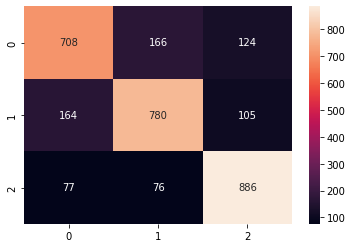

In [134]:

print(rf_model2.score(val_X, val_y))
results_cvs = cross_val_score(rf_model2, X, y, cv=StratifiedKFold(shuffle = True))
print(results_cvs)
print(f'Mean: {results_cvs.mean()}, Standard Deviation: {results_cvs.std()}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [35]:
accuracy_score(val_y, y_pred)

0.7619047619047619

In [43]:
rf_model2.score(val_X, val_y)

0.7039337474120083

1    1049
2    1039
0     998
Name: code_prim_fuel_transf, dtype: int64


<AxesSubplot:>

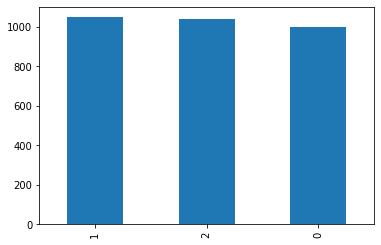

In [41]:
print(val_y.value_counts())
val_y.value_counts().plot.bar()

# XGBOOST

In [201]:
xgbclass_model_1 = XGBClassifier(random_state=0)
xgbclass_model_1.fit(train_X, train_y)
# xgbclass_model_1.fit(train_X_scaled_pca, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

0.7725210628645496
[0.75696695 0.75850891 0.76726094 0.7643436  0.77082658]
Mean: 0.7635813959839542, Standard Deviation: 0.005217158081883601


<AxesSubplot:>

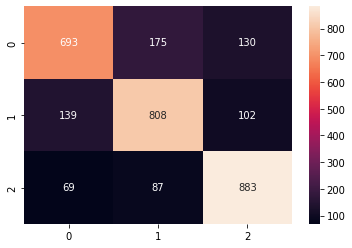

In [202]:
y_pred = xgbclass_model_1.predict(val_X)
print(np.around(xgbclass_model_1.score(val_X, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(xgbclass_model_1, X, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [224]:
val_y.index.tolist()
val_y.tolist()
new_df = pd.DataFrame({"indice": val_y.index.tolist(), "valor": val_y.tolist(), "prediccion":y_pred})
new_df.set_index('indice', inplace= True)
df_power_plants_raw = pd.read_csv(dir_data_raw/"global_power_plant_database.csv", usecols=['primary_fuel'], engine='python')


In [225]:
new_df.head()

,valor,prediccion
indice,,
14472,1,2
25057,1,1
31305,0,0
1713,2,2
2808,0,0


In [223]:
df_power_plants_raw.head()

,primary_fuel
0,Hydro
1,Solar
2,Solar
3,Hydro
4,Hydro


In [226]:
df_power_plants_raw = df_power_plants_raw.join(new_df)
df_power_plants_raw[['primary_fuel', 'valor', 'prediccion']].value_counts()

primary_fuel  valor  prediccion
Wind          2.0    2.0           883
Solar         1.0    1.0           808
Hydro         0.0    0.0           298
Gas           0.0    0.0           142
Solar         1.0    0.0           139
                     2.0           102
Oil           0.0    0.0            95
Wind          2.0    1.0            87
Coal          0.0    0.0            80
Wind          2.0    0.0            69
Gas           0.0    1.0            52
Biomass       0.0    0.0            42
Hydro         0.0    1.0            42
                     2.0            34
Gas           0.0    2.0            32
Coal          0.0    1.0            25
                     2.0            21
Waste         0.0    1.0            20
                     0.0            20
Oil           0.0    1.0            17
Biomass       0.0    1.0            16
Oil           0.0    2.0            14
Waste         0.0    2.0            13
Biomass       0.0    2.0            12
Geothermal    0.0    0.0        

In [217]:
new_df.set_index('indice')

,valor,prediccion
indice,,
14472,1,2
25057,1,1
31305,0,0
1713,2,2
2808,0,0
...,...,...
21040,0,0
12801,0,0
25992,1,1


In [49]:
param_grid = {
                'n_estimators': [5,10,50,100,500,1000],
                'learning_rate': [0.01,0.05,0.1,0.2],
                'max_depth': [2,3,4],
            }

In [50]:
xgb_grid = GridSearchCV(estimator = XGBClassifier(), param_grid = param_grid, cv=5, verbose = 2, n_jobs=4)

In [ ]:
xgb_grid.fit(train_X, train_y)

In [36]:
xgb_grid.best_params_

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50}

In [37]:
xgb_grid.score(val_X, val_y)

0.7432712215320911

In [51]:
xgbclass_model_2 = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4)
# xgbclass_model_2 = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4, early_stopping_rounds=5)
xgbclass_model_2.fit(train_X, train_y, 
             eval_set=[(val_X, val_y)], 
             verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=4, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

0.7705767984445885
[0.52883992 0.51215559 0.50923825 0.5452188  0.62171799]
Mean: 0.5434341108640369, Standard Deviation: 0.04121224073568436


<AxesSubplot:>

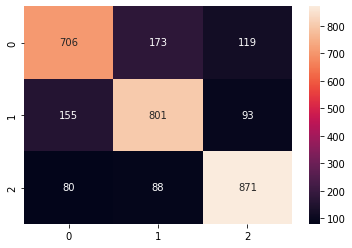

In [52]:
y_pred = xgbclass_model_2.predict(val_X)
print(xgbclass_model_2.score(val_X, val_y))
results_cvs = cross_val_score(xgbclass_model_2, X, y, cv=StratifiedKFold(shuffle = True))
print(results_cvs)
print(f'Mean: {results_cvs.mean()}, Standard Deviation: {results_cvs.std()}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# KNN

8


<AxesSubplot:>

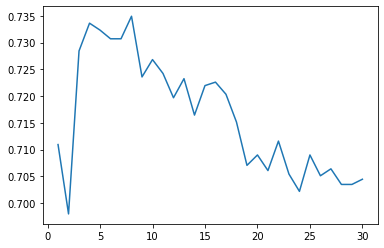

In [138]:
candidate_n_neighbors = np.arange(1,31)
results = {}
# Write loop to find the ideal tree size from candidate_max_leaf_nodes


# results = {n: get_accuracy_knn(n, train_X_scaled_pca, val_X_scaled_pca, train_y, val_y) for n in candidate_n_neighbors}
results = {n: get_accuracy_knn(n, train_X, val_X, train_y, val_y) for n in candidate_n_neighbors}
best_n_neighbors = max(results, key=results.get)
print(best_n_neighbors)
sns.lineplot(data=results, x= results.keys(), y= results.values())

In [96]:
knn_model_1 = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn_model_1.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=8)

0.7339598185353208
[0.73655217 0.73095624 0.70502431 0.72350081 0.72285251]
Mean: 0.7237772089354234, Standard Deviation: 0.010652143237466192


<AxesSubplot:>

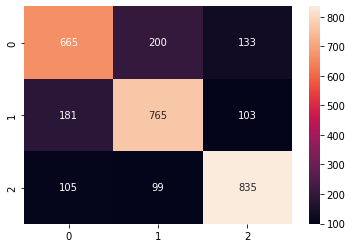

In [97]:
y_pred = knn_model_1.predict(val_X)
print(knn_model_1.score(val_X, val_y))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(knn_model_1, X, y, cv=StratifiedKFold(shuffle = True))
print(results_cvs)
print(f'Mean: {results_cvs.mean()}, Standard Deviation: {results_cvs.std()}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [139]:
# train_X_normalized = stats.boxcox(train_X)
x = train_X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
power_transformer = PowerTransformer(method='yeo-johnson')
standard_scaler = StandardScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# x_scaled = power_transformer.fit_transform(x)
x_scaled = standard_scaler.fit_transform(x)
train_X_scaled = pd.DataFrame(x_scaled, index=train_X.index, columns=train_X.columns)

x = val_X.values #returns a numpy array
# x_scaled = min_max_scaler.fit_transform(x)
# x_scaled = power_transformer.fit_transform(x)
x_scaled = standard_scaler.fit_transform(x)
val_X_scaled = pd.DataFrame(x_scaled, index=val_X.index, columns=val_X.columns)

x = X.values #returns a numpy array
# x_scaled = min_max_scaler.fit_transform(x)
# x_scaled = power_transformer.fit_transform(x)
x_scaled = standard_scaler.fit_transform(x)
X_scaled = pd.DataFrame(x_scaled, index=X.index, columns=X.columns)


In [140]:
train_X_scaled

,autumn_ALLSKY_SFC_SW_DWN_2012,autumn_ALLSKY_SFC_SW_DWN_2013,autumn_ALLSKY_SFC_SW_DWN_2014,autumn_ALLSKY_SFC_SW_DWN_2015,autumn_ALLSKY_SFC_SW_DWN_2016,autumn_ALLSKY_SFC_SW_DWN_2017,autumn_ALLSKY_SFC_SW_DWN_2018,autumn_ALLSKY_SFC_SW_DWN_2019,autumn_CLRSKY_SFC_SW_DWN_2012,autumn_CLRSKY_SFC_SW_DWN_2013,...,winter_WS50M_MAX_AVG_2018,winter_WS50M_MAX_AVG_2019,winter_WS50M_MIN_AVG_2012,winter_WS50M_MIN_AVG_2013,winter_WS50M_MIN_AVG_2014,winter_WS50M_MIN_AVG_2015,winter_WS50M_MIN_AVG_2016,winter_WS50M_MIN_AVG_2017,winter_WS50M_MIN_AVG_2018,winter_WS50M_MIN_AVG_2019
index,,,,,,,,,,,,,,,,,,,,,
31041,0.706616,0.270482,0.510870,0.623599,0.713572,0.592575,0.607015,0.598658,0.867703,0.878378,...,0.394874,0.387508,-0.143964,0.258581,0.321937,0.512268,0.302153,0.167372,0.068505,0.199213
23692,-0.051709,0.139147,0.012596,0.242553,0.142975,0.082833,0.411551,0.227206,0.647311,0.683068,...,-0.391136,-0.203827,0.343761,0.164491,0.151436,0.286256,0.459554,0.420223,0.095852,0.489670
2786,0.744022,0.664486,0.580074,0.708670,0.682353,0.627608,0.572944,0.548169,0.376170,0.357552,...,2.411083,2.206722,3.351013,3.593541,3.537087,3.591380,2.994675,3.432752,3.409786,3.263298
20347,0.456675,0.838416,0.720214,0.983377,0.661541,0.995463,0.585496,0.876345,0.911202,0.968075,...,-1.164352,-0.966957,-0.284965,-0.154369,-0.089700,-0.491420,-0.348918,-0.319063,-0.453570,-0.200761
12786,-1.690778,-1.747461,-1.759043,-1.753061,-1.790811,-1.794977,-1.747524,-1.767092,-1.749457,-1.748899,...,0.897555,1.470718,1.702919,1.413794,1.590947,1.591294,1.287106,1.277505,0.918742,1.718161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29395,0.978660,0.868588,1.123331,0.997555,1.006674,1.007725,0.976425,1.191899,0.876403,0.861017,...,-1.094890,-1.274378,-0.772690,-0.596068,-0.710809,-0.666398,-0.682800,-0.490038,-0.453570,-0.693585
7622,-0.713117,-0.702106,-0.608515,-1.086675,-1.057187,-0.899864,-1.051742,-0.793384,-0.682294,-0.686993,...,-0.175441,-0.583583,-0.095422,-0.109938,0.102722,-0.488990,-0.220135,-0.408163,-0.259657,-0.488837
22402,-0.004101,0.234986,0.254813,0.513716,0.174193,0.275519,0.390032,0.248844,0.695159,0.736597,...,0.338208,0.597278,1.115800,0.616645,0.679988,0.901106,0.919835,0.877761,0.627871,0.958687


In [141]:
def axis_calculation(total_columns_df, grid_columns):
    rows = int(total_columns_df / grid_columns)
    if( total_columns_df % grid_columns) > 0:
        rows += 1

    return (rows, grid_columns)
print(axis_calculation(30, 4))

(8, 4)


In [142]:

# # plt.figure(figsize=(200,200))
# grid_columns = 5
# result_axis = axis_calculation(len(train_X_scaled.columns), grid_columns)
# fig, axs = plt.subplots(result_axis[0],result_axis[1], figsize=(30,20))
# fig.subplots_adjust(hspace=.5)

# aux_cont = 0
# aux_cont_2 = 0
# # fig.figsize=(30,30)
# for col in train_X_scaled.columns:
# # #     # print(col)
#     sns.kdeplot(data=train_X_scaled, x=col, shade=True, ax=axs[aux_cont_2, aux_cont] )
#     # axs[aux_cont_2, aux_cont].set_xlabel('Participation Rate')
#     # axs[aux_cont_2, aux_cont].set_ylabel('Frequency')
#     # axs[aux_cont_2, aux_cont].set_title("sasa")
#     axs[aux_cont_2, aux_cont].set_xticklabels([])
#     aux_cont += 1
#     if aux_cont >= grid_columns:
#         aux_cont_2 +=1
#         aux_cont = 0

In [143]:
# train_X_scaled.hist(bins=100, xlabelsize=8, ylabelsize=10, figsize=(30,20))


In [144]:
# WITHOUT SCALING OR NORMALIZING
# train_X.hist(bins=100, xlabelsize=8, ylabelsize=10, figsize=(30,20))

4


<AxesSubplot:>

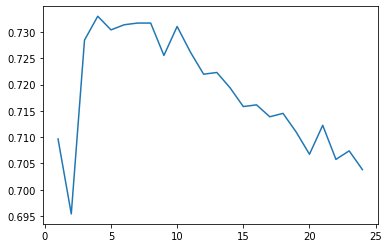

In [145]:
candidate_n_neighbors = np.arange(1,25)
results = {}
# Write loop to find the ideal tree size from candidate_max_leaf_nodes


results = {n: get_accuracy_knn(n, train_X_scaled, val_X_scaled, train_y, val_y) for n in candidate_n_neighbors}
best_n_neighbors = max(results, key=results.get)
print(best_n_neighbors)
sns.lineplot(data=results, x= results.keys(), y= results.values())

In [146]:
knn_model_2 = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn_model_2.fit(train_X_scaled, train_y)

KNeighborsClassifier(n_neighbors=4)

In [147]:
knn_model_2.score(val_X_scaled, val_y)

0.7329876863253403

0.733
[0.705 0.721 0.697 0.712 0.721]
Mean: 0.711, Standard Deviation: 0.009


<AxesSubplot:>

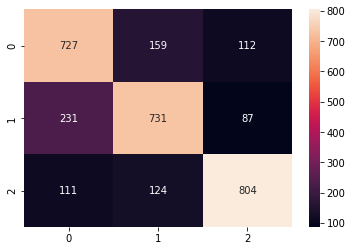

In [153]:
y_pred = knn_model_2.predict(val_X_scaled)
print(np.around(knn_model_2.score(val_X_scaled, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(knn_model_2, X_scaled, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# NAIVE BAYES

0.527
[0.509 0.539 0.517 0.528 0.521]
Mean: 0.523, Standard Deviation: 0.01


<AxesSubplot:>

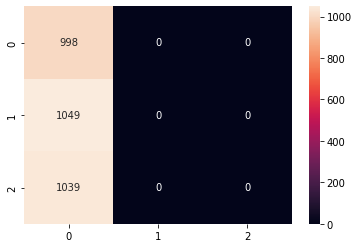

In [156]:
nb_model_1 = GaussianNB()

#Entreno el modelo
nb_model_1.fit(train_X, train_y)

#Realizo una predicción
y_pred = nb_model_1.predict(val_X_scaled)
print(np.around(nb_model_1.score(val_X, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(nb_model_1, X, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

0.528
[0.52  0.532 0.512 0.54  0.512]
Mean: 0.523, Standard Deviation: 0.011


<AxesSubplot:>

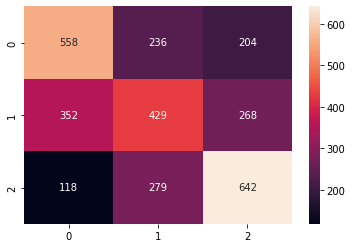

In [157]:
nb_model_2 = GaussianNB()
nb_model_2.fit(train_X_scaled, train_y)


y_pred = nb_model_2.predict(val_X_scaled)
print(np.around(nb_model_2.score(val_X_scaled, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(nb_model_2, X_scaled, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# SVM

In [159]:
svm_model_1 = SVC(random_state=22)
svm_model_1.fit(train_X_scaled, train_y)

SVC(random_state=22)

0.695
[0.682 0.681 0.69  0.679 0.695]
Mean: 0.686, Standard Deviation: 0.006


<AxesSubplot:>

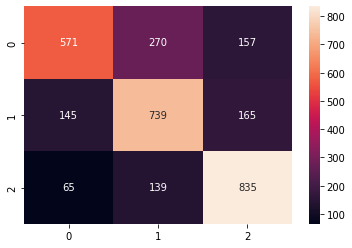

In [160]:
y_pred = svm_model_1.predict(val_X_scaled)
print(np.around(svm_model_1.score(val_X_scaled, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(svm_model_1, X_scaled, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [87]:
param_grid = {
                'C': [0.5, 1, 10, 100], # NOTE: values for C must be > 0
                'gamma': ['scale', 1, .1, .01, .001, .0001],
                'kernel': ['rbf'] # Some linear fittings last to 7/8 mins. Not recommended at all
            }
# svm_grid = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv=5, verbose = 2, n_jobs=4)
svm_grid = RandomizedSearchCV(estimator = SVC(), param_distributions = param_grid, cv=5, verbose = 2, n_jobs=4)

In [ ]:
svm_grid.fit(train_X_scaled, train_y)

In [89]:
svm_grid.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 100}

In [90]:
svm_model_2 = SVC(C= 100, gamma= 1, kernel='rbf', random_state=22)
svm_model_2.fit(train_X_scaled, train_y)

SVC(C=100, gamma=1, random_state=22)

In [91]:
y_pred = svm_model_2.predict(val_X_scaled)

In [92]:
svm_model_2.score(val_X_scaled, val_y)

0.7556935817805382

<AxesSubplot:>

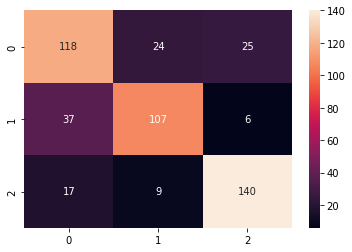

In [93]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# PCA

In [161]:
pca = PCA(n_components=3)
pca.fit(train_X_scaled)

PCA(n_components=3)

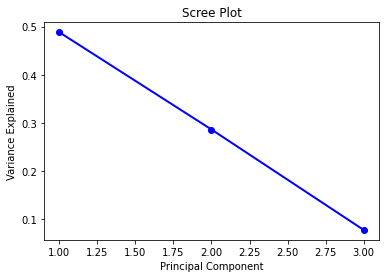

In [162]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [163]:
train_X_scaled_pca = pca.transform(train_X_scaled)
val_X_scaled_pca = pca.transform(val_X_scaled)

In [164]:
train_pc1_coords = train_X_scaled_pca[:,0]
train_pc2_coords = train_X_scaled_pca[:,1]
train_pc3_coords = train_X_scaled_pca[:,2]

# LOGISTIC REGRESSION

/home/tomas/renewable_power_plants/renewable_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6659105638366818


<AxesSubplot:>

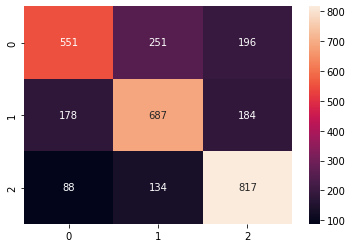

In [166]:
logistic_model_1 = LogisticRegression(random_state=22)
logistic_model_1.fit(train_X_scaled, train_y)
y_pred = logistic_model_1.predict(val_X_scaled)
print(logistic_model_1.score(val_X_scaled, val_y))
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# LDA

In [167]:
lda = LDA(n_components = 2)
train_X_scaled_lda = lda.fit_transform(train_X_scaled, train_y)
val_X_scaled_lda = lda.transform(val_X_scaled)

0.6843810758263124


<AxesSubplot:>

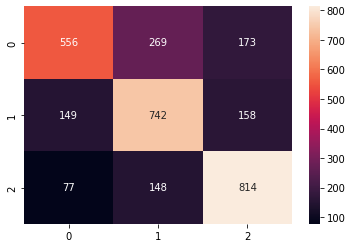

In [168]:
lda.fit(train_X_scaled_lda, train_y)
y_pred = lda.predict(val_X_scaled_lda)
print(lda.score(val_X_scaled_lda, val_y))
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# NEURAL NETWORK

0.6243523316062176


<AxesSubplot:>

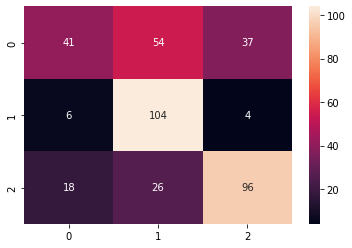

In [80]:
nn_model_1 = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
nn_model_1.fit(train_X, train_y)
y_pred = nn_model_1.predict(val_X)
print(nn_model_1.score(val_X, val_y))
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# TEST PREDICTION

In [203]:
df_to_predict = pd.read_csv(dir_data_external/"data_predict.csv", index_col=['index'])
df_to_predict.drop(columns=['latitude','longitude'], inplace=True)

In [204]:
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [205]:
# print(df_to_predict.columns)
# print(df_to_predict.columns.tolist())

In [206]:
columns_delete = df_to_predict.columns.str.contains('ALLSKY_KT') | df_to_predict.columns.str.contains('ANN') | df_to_predict.columns.str.contains('autumn_CLRSKY_SFC_SW_DWN_2019')
df_to_predict = df_to_predict.loc[:,~columns_delete]
# df_to_predict = df_to_predict.loc[:,~COLUMNS_TO_DELETE]

In [207]:
y_predicted_test = xgbclass_model_1.predict(df_to_predict)
print(y_predicted_test)

[0]


In [85]:
df_target_equivalent

,primary_fuel_transformed,code_prim_fuel_transf
index,,
24713,Solar,1
24717,Other,0
24749,Wind,2


# BAGGING CLASSIFIER

0.7383419689119171
[0.71197411 0.73139159 0.7184466  0.76699029 0.73701299]
Mean: 0.7331631152019502, Standard Deviation: 0.019119557381616425


<AxesSubplot:>

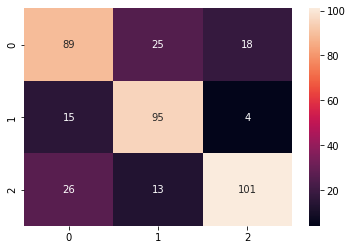

In [86]:
bag_model_1 = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50)
bag_model_1.fit(train_X_scaled, train_y)
y_pred = bag_model_1.predict(val_X_scaled)
print(bag_model_1.score(val_X_scaled, val_y))

results_cvs = cross_val_score(bag_model_1, train_X_scaled, train_y, cv=5)
print(results_cvs)
print(f'Mean: {results_cvs.mean()}, Standard Deviation: {results_cvs.std()}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [87]:
classifier = {
        'KNeighbors': KNeighborsClassifier(n_neighbors=9),
        'DecisionTree': DecisionTreeClassifier(max_leaf_nodes=50),
        'XGBClassifier': XGBClassifier()
    }

for name, estimator in classifier.items():
    bag_class = BaggingClassifier(base_estimator=estimator, n_estimators=5).fit(train_X_scaled, train_y)
    
    bag_pred = bag_class.predict(val_X_scaled)

    print(f'Accuracy Bagging with {name}: {accuracy_score(bag_pred, val_y)}')
    print('')
    print(f'Mean: {cross_val_score(bag_class, X, y, cv=5).mean()}, Standard Deviation: {cross_val_score(tree_model, X, y, cv=5).std()}')
    print('')

Accuracy Bagging with KNeighbors: 0.7305699481865285

Mean: 0.7181347150259068, Standard Deviation: 0.017601334457474662

Accuracy Bagging with DecisionTree: 0.7202072538860104

Mean: 0.7383419689119171, Standard Deviation: 0.017601334457474662

Accuracy Bagging with XGBClassifier: 0.7331606217616581

Mean: 0.7476683937823834, Standard Deviation: 0.017601334457474662



# VOTING CLASSIFIER

0.7383419689119171
[0.72815534 0.73786408 0.75404531 0.7961165  0.75974026]
Mean: 0.7551842979027446, Standard Deviation: 0.023358314400577847


<AxesSubplot:>

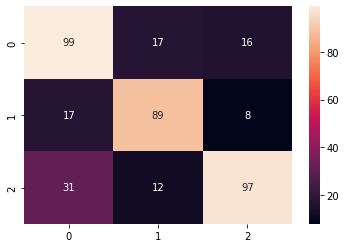

In [89]:


votclass_model_1 = VotingClassifier(estimators=[
    ('knn', KNeighborsClassifier(n_neighbors=9)), ('dt', DecisionTreeClassifier(max_leaf_nodes=50)), ('xgb', XGBClassifier())], voting='hard')
votclass_model_1.fit(train_X_scaled, train_y)

y_pred = votclass_model_1.predict(val_X_scaled)
print(votclass_model_1.score(val_X_scaled, val_y))
results_cvs = cross_val_score(votclass_model_1, train_X_scaled, train_y, cv=5)
print(results_cvs)
print(f'Mean: {results_cvs.mean()}, Standard Deviation: {results_cvs.std()}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# ADABOOST

# GRADIENT TREE BOOSTING

0.7642487046632125
[0.72815534 0.75728155 0.74110032 0.78964401 0.74350649]
Mean: 0.7519375446559913, Standard Deviation: 0.020997416178987927


<AxesSubplot:>

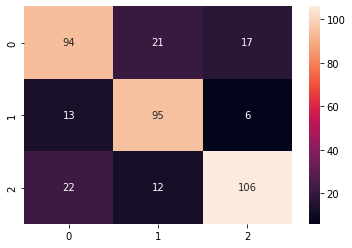

In [90]:
gradboost_model_1 = GradientBoostingClassifier(n_estimators=50)
gradboost_model_1.fit(train_X, train_y)
y_pred = gradboost_model_1.predict(val_X)
print(gradboost_model_1.score(val_X, val_y))
results_cvs = cross_val_score(gradboost_model_1, train_X, train_y, cv=5)
print(results_cvs)
print(f'Mean: {results_cvs.mean()}, Standard Deviation: {results_cvs.std()}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')